In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


## import

In [ ]:
# Import các thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB

# data

## read data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Hoc Tap NTTU/Hoc may va ung dung/Do an/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Xem thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## chuẩn hóa dữ liệu thành 1 dạng

Mã hóa các cột thành một dạng

In [ ]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


## giá trị null

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [ ]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [ ]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop(["id"], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


<Figure size 6400x4800 with 0 Axes>

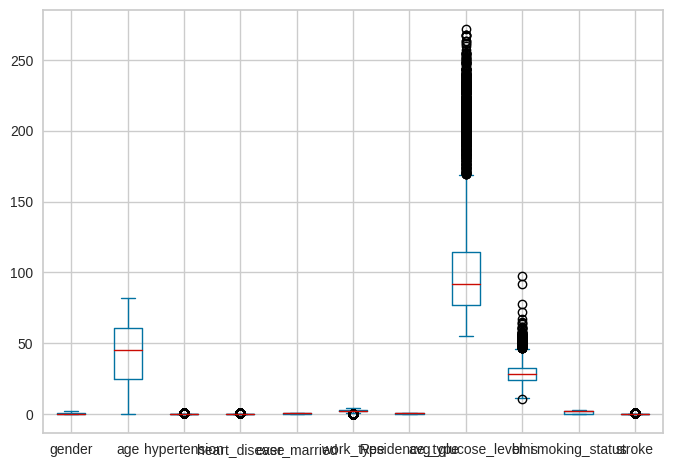

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=800, facecolor='w', edgecolor='k')
df.plot(kind='box')
plt.show()

## cân bằng lớp

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

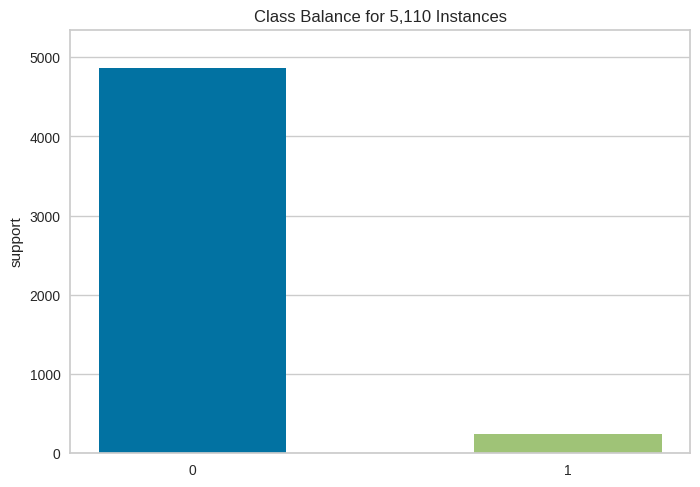

<Axes: title={'center': 'Class Balance for 5,110 Instances'}, ylabel='support'>

In [ ]:
#Biểu diễn sự cân bằng của các phân lớp
from yellowbrick.target import ClassBalance
y = df['stroke']
visualizer = ClassBalance(labels=[0,1])
visualizer.fit(y)
visualizer.poof()

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Tách dữ liệu và nhãn
X = df.drop('stroke', axis=1)
y = df['stroke']

# Tạo dữ liệu nhân tạo bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Tạo DataFrame mới từ dữ liệu đã oversample
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Hiển thị 5 dòng đầu tiên của DataFrame mới
df_resampled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9722 entries, 0 to 9721
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9722 non-null   int64  
 1   age                9722 non-null   float64
 2   hypertension       9722 non-null   int64  
 3   heart_disease      9722 non-null   int64  
 4   ever_married       9722 non-null   int64  
 5   work_type          9722 non-null   int64  
 6   Residence_type     9722 non-null   int64  
 7   avg_glucose_level  9722 non-null   float64
 8   bmi                9722 non-null   float64
 9   smoking_status     9722 non-null   int64  
 10  stroke             9722 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 835.6 KB


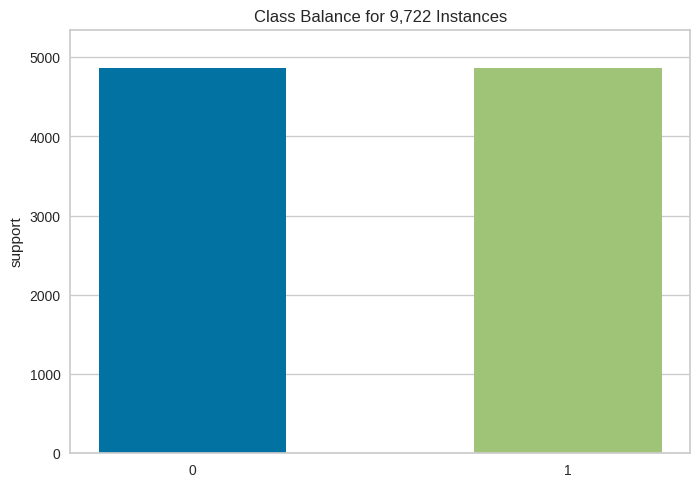

<Axes: title={'center': 'Class Balance for 9,722 Instances'}, ylabel='support'>

In [ ]:
#Biểu diễn sự cân bằng của các phân lớp
from yellowbrick.target import ClassBalance
y = df_resampled['stroke']
visualizer = ClassBalance(labels=[0,1])
visualizer.fit(y)
visualizer.poof()

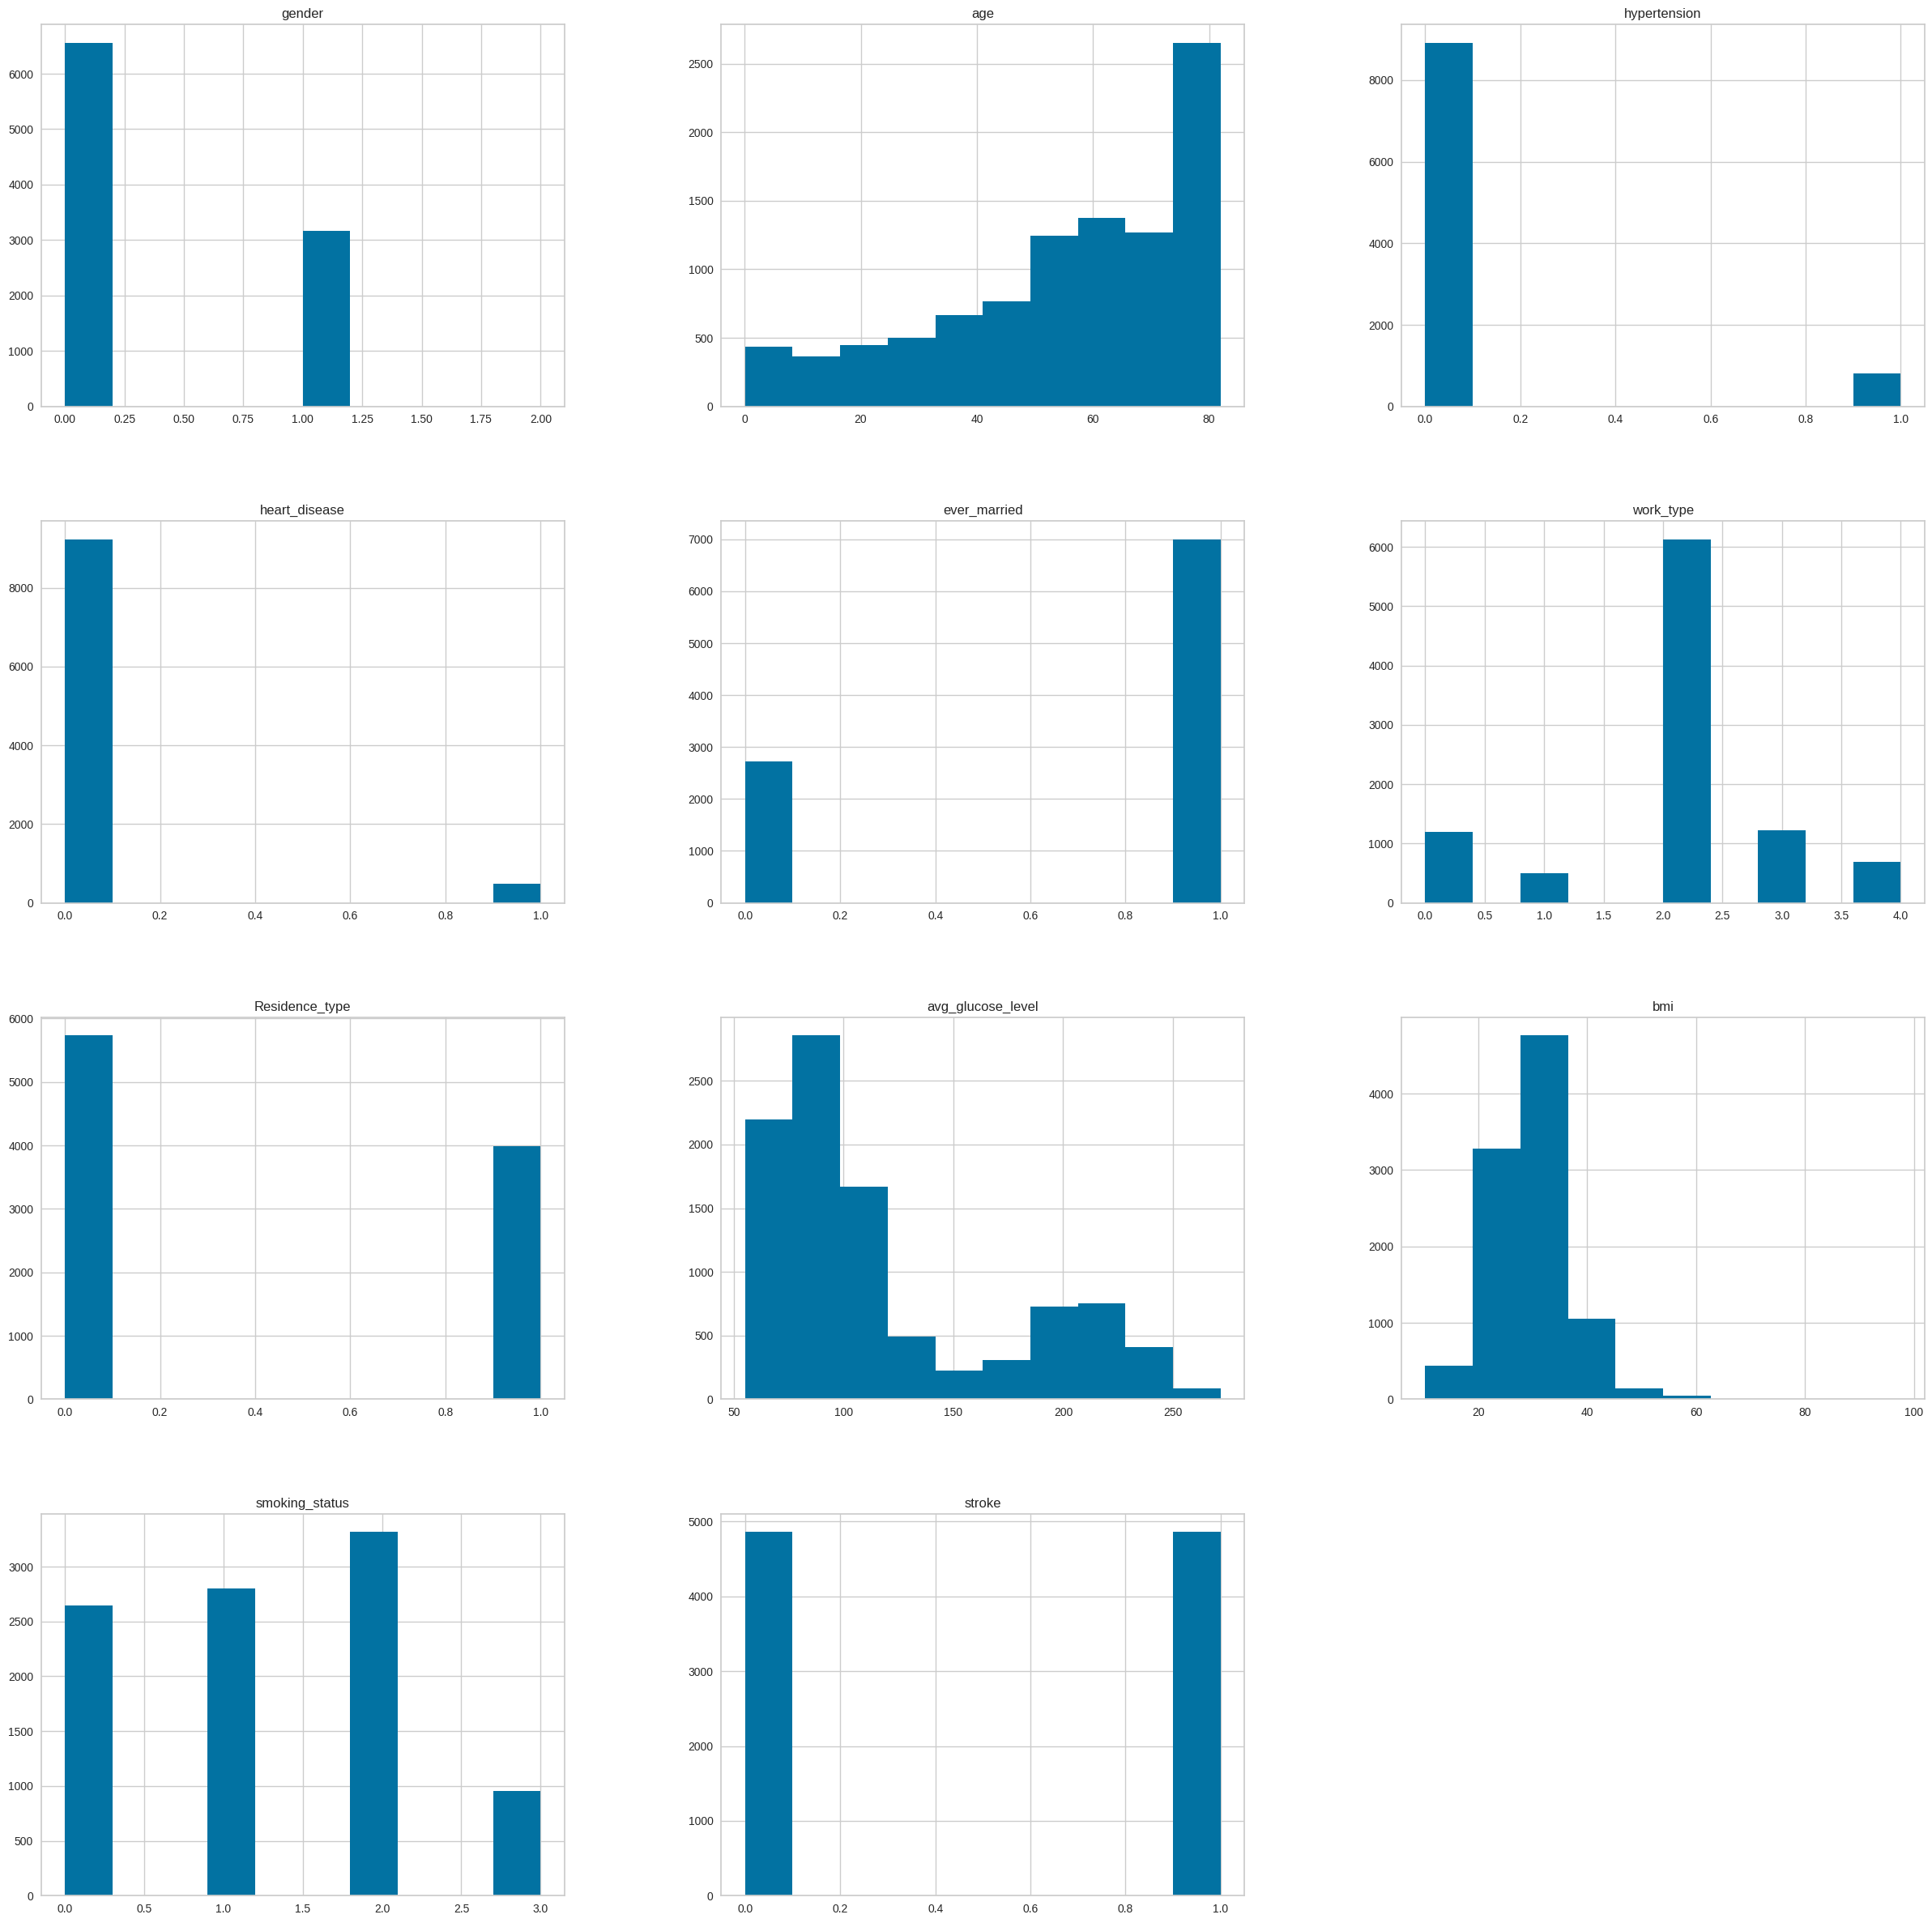

In [ ]:
import matplotlib.pyplot as plt
df_resampled.hist(figsize =(30, 30))
plt.show()

# Chuẩn bị dữ liệu

In [ ]:
X = df_resampled.drop(['stroke'],axis=1)
y = df_resampled['stroke']

In [ ]:
X.shape

(9722, 10)

In [ ]:
y.shape

(9722,)

In [ ]:
# Chia dữ liệu thành các fold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # Chia thành 5 fold

In [ ]:

std=StandardScaler()

In [ ]:
# Vòng lặp K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(k_fold.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Khởi tạo StandardScaler
    std = StandardScaler()

    # Chuẩn hóa dữ liệu trong tập huấn luyện và tập kiểm tra
    X_train_std = std.fit_transform(X_train)
    X_test_std = std.transform(X_test)

    print(f"Fold {fold}:")
    print("Dữ liệu huấn luyện đã chuẩn hóa:")
    print(X_train_std)
    print("Dữ liệu kiểm tra đã chuẩn hóa:")
    print(X_test_std)
    print("-" * 40)

Fold 1:
Dữ liệu huấn luyện đã chuẩn hóa:
[[-0.69398558  0.26233571 -0.30098236 ...  1.50223481 -0.08406506
   0.75941554]
 [ 1.43926576  1.1215225  -0.30098236 ... -0.23978431  0.46562926
   0.75941554]
 [-0.69398558  1.07630214  3.32245387 ...  0.99404791 -0.82982641
   0.75941554]
 ...
 [-0.69398558  0.71041796 -0.30098236 ...  2.59910983  1.41888395
  -0.27309751]
 [ 1.43926576  1.1215225  -0.30098236 ...  2.45193956  0.21335001
  -0.27309751]
 [-0.69398558  0.23825625 -0.30098236 ...  1.49457618  0.19619473
  -0.27309751]]
Dữ liệu kiểm tra đã chuẩn hóa:
[[ 1.43926576  0.53365785 -0.30098236 ...  1.9812946   1.09049611
  -0.27309751]
 [-0.69398558 -0.28030859 -0.30098236 ...  0.94176381  0.7552017
   1.79192859]
 [-0.69398558  0.17189499 -0.30098236 ... -0.77836474 -0.08406506
  -1.30561056]
 ...
 [ 1.43926576  1.16257683  3.32245387 ...  2.36492279 -0.22040445
   0.75941554]
 [ 1.43926576  0.10876992 -0.30098236 ... -0.55778167  1.44636674
  -1.30561056]
 [-0.69398558  0.8933289  -

# mô hình Logistic Regression

In [ ]:
model_gr = LogisticRegression()

total_accuracy = 0
# Vòng lặp K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(k_fold.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Chuẩn hóa dữ liệu trong từng fold
    X_train_std = std.fit_transform(X_train)
    X_test_std = std.transform(X_test)

    # Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
    model_gr.fit(X_train_std, y_train)

    # Dự đoán nhãn cho tập kiểm tra
    y_pred = model_gr.predict(X_test_std)

    # Đánh giá hiệu suất mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy LogisticRegression = {accuracy:.4f}")
    # Tích luỹ độ chính xác của các fold
    total_accuracy += accuracy

# Tính trung bình chung độ chính xác của các fold
average_accuracy_gr = total_accuracy / k_fold.get_n_splits()
print(f"Average Accuracy across all folds: {average_accuracy_gr:.4f}")

Fold 1: Accuracy LogisticRegression = 0.8067
Fold 2: Accuracy LogisticRegression = 0.8123
Fold 3: Accuracy LogisticRegression = 0.8020
Fold 4: Accuracy LogisticRegression = 0.8030
Fold 5: Accuracy LogisticRegression = 0.8230
Average Accuracy across all folds: 0.8094


# Guassian Bayes

In [ ]:
model_NB = GaussianNB()

total_accuracy = 0
# Vòng lặp K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(k_fold.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Chuẩn hóa dữ liệu trong từng fold
    X_train_std = std.fit_transform(X_train)
    X_test_std = std.transform(X_test)

    # Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
    model_NB.fit(X_train_std, y_train)

    # Dự đoán nhãn cho tập kiểm tra
    y_pred = model_NB.predict(X_test_std)

    # Đánh giá hiệu suất mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy GaussianNB = {accuracy:.4f}")
    # Tích luỹ độ chính xác của các fold
    total_accuracy += accuracy

# Tính trung bình chung độ chính xác của các fold
average_accuracy_NB = total_accuracy / k_fold.get_n_splits()
print(f"Average Accuracy across all folds: {average_accuracy_NB:.4f}")

Fold 1: Accuracy GaussianNB = 0.7830
Fold 2: Accuracy GaussianNB = 0.7877
Fold 3: Accuracy GaussianNB = 0.7840
Fold 4: Accuracy GaussianNB = 0.7891
Fold 5: Accuracy GaussianNB = 0.7978
Average Accuracy across all folds: 0.7883


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

total_accuracy = 0
# Vòng lặp K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(k_fold.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Chuẩn hóa dữ liệu trong từng fold
    X_train_std = std.fit_transform(X_train)
    X_test_std = std.transform(X_test)

    # Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
    model_KNN.fit(X_train_std, y_train)

    # Dự đoán nhãn cho tập kiểm tra
    y_pred = model_KNN.predict(X_test_std)

    # Đánh giá hiệu suất mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy KNeighborsClassifier = {accuracy:.4f}")
    # Tích luỹ độ chính xác của các fold
    total_accuracy += accuracy

# Tính trung bình chung độ chính xác của các fold
average_accuracy_KNN = total_accuracy / k_fold.get_n_splits()
print(f"Average Accuracy across all folds: {average_accuracy_KNN:.4f}")

Fold 1: Accuracy KNeighborsClassifier = 0.8740
Fold 2: Accuracy KNeighborsClassifier = 0.8828
Fold 3: Accuracy KNeighborsClassifier = 0.8853
Fold 4: Accuracy KNeighborsClassifier = 0.8704
Fold 5: Accuracy KNeighborsClassifier = 0.8832
Average Accuracy across all folds: 0.8791


# random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier()

total_accuracy = 0
# Vòng lặp K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(k_fold.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Chuẩn hóa dữ liệu trong từng fold
    X_train_std = std.fit_transform(X_train)
    X_test_std = std.transform(X_test)

    # Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
    model_rf.fit(X_train_std, y_train)

    # Dự đoán nhãn cho tập kiểm tra
    y_pred = model_rf.predict(X_test_std)

    # Đánh giá hiệu suất mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy RandomForest = {accuracy:.4f}")
    # Tích luỹ độ chính xác của các fold
    total_accuracy += accuracy

# Tính trung bình chung độ chính xác của các fold
average_accuracy_fr = total_accuracy / k_fold.get_n_splits()
print(f"Average Accuracy across all folds: {average_accuracy_fr:.4f}")

Fold 1: Accuracy RandomForest = 0.9501
Fold 2: Accuracy RandomForest = 0.9429
Fold 3: Accuracy RandomForest = 0.9465
Fold 4: Accuracy RandomForest = 0.9398
Fold 5: Accuracy RandomForest = 0.9460
Average Accuracy across all folds: 0.9451


# SVM

In [ ]:
from sklearn.svm import SVC
model_SV = SVC()

total_accuracy = 0
# Vòng lặp K-Fold Cross-Validation
for fold, (train_index, test_index) in enumerate(k_fold.split(X), start=1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Chuẩn hóa dữ liệu trong từng fold
    X_train_std = std.fit_transform(X_train)
    X_test_std = std.transform(X_test)

    # Huấn luyện mô hình trên dữ liệu đã chuẩn hóa
    model_SV.fit(X_train_std, y_train)

    # Dự đoán nhãn cho tập kiểm tra
    y_pred = model_SV.predict(X_test_std)

    # Đánh giá hiệu suất mô hình
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold}: Accuracy SVM = {accuracy:.4f}")
    # Tích luỹ độ chính xác của các fold
    total_accuracy += accuracy

# Tính trung bình chung độ chính xác của các fold
average_accuracy_SV = total_accuracy / k_fold.get_n_splits()
print(f"Average Accuracy across all folds: {average_accuracy_SV:.4f}")

Fold 1: Accuracy SVM = 0.8555
Fold 2: Accuracy SVM = 0.8591
Fold 3: Accuracy SVM = 0.8560
Fold 4: Accuracy SVM = 0.8539
Fold 5: Accuracy SVM = 0.8637
Average Accuracy across all folds: 0.8576


# đánh giá

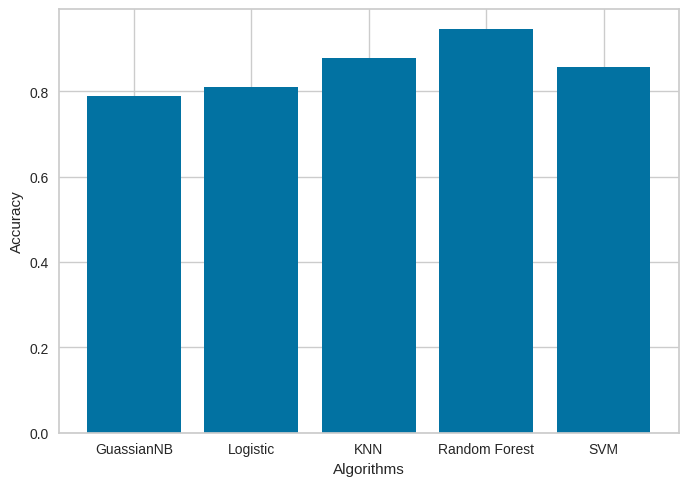

In [ ]:
plt.bar(['GuassianNB','Logistic','KNN','Random Forest','SVM'],[average_accuracy_NB,average_accuracy_gr,average_accuracy_KNN,average_accuracy_fr,average_accuracy_SV])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
gender = int(input("Nhập giới tính (0: Nữ, 1: Nam): "))
age = int(input("Nhập tuổi: "))
hypertension = int(input("Nhập tình trạng tăng huyết áp (0: Không, 1: Có): "))
heart_disease = int(input("Có bị tim (0: không, 1:có)"))
ever_married = int(input("Nhập tình trạng kết hôn (0: Không, 1: Có): "))
work_type = int(input("Nhập loại công việc (0-4): "))
residence_type = int(input("Nhập loại nơi cư trú (0: Nông thôn, 1: Thành thị): "))
avg_glucose_level = float(input("Nhập mức độ glucose trung bình: "))
bmi = float(input("Nhập chỉ số BMI: "))
smoking_status = int(input("Nhập tình trạng hút thuốc (0-3): "))

new_data = pd.DataFrame({
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'ever_married': [ever_married],
    'work_type': [work_type],
    'Residence_type': [residence_type],
    'avg_glucose_level': [avg_glucose_level],
    'bmi': [bmi],
    'smoking_status': [smoking_status]
})

# Chuẩn hóa dữ liệu mới
new_data_std = std.transform(new_data)

# Dự đoán
prediction = model_rf.predict(new_data_std)

# In kết quả dự đoán
if prediction[0] == 1:
    print("Có nguy cơ đột quỵ")
else:
    print("Không có nguy cơ đột quỵ")
#thử mẫu đầu tiên trong data
#1  67.0  0   1	  1	  2	  1	  228.69  36.600000	  1 |	1

Nhập giới tính (0: Nữ, 1: Nam): 1
Nhập tuổi: 67
Nhập tình trạng tăng huyết áp (0: Không, 1: Có): 0
Có bị tim (0: không, 1:có)1
Nhập tình trạng kết hôn (0: Không, 1: Có): 1
Nhập loại công việc (0-4): 2
Nhập loại nơi cư trú (0: Nông thôn, 1: Thành thị): 1
Nhập mức độ glucose trung bình: 228.69
Nhập chỉ số BMI: 36.6
Nhập tình trạng hút thuốc (0-3): 1
Có nguy cơ đột quỵ
